## Hausaufgabe 4

#### **Abgabe** <br> 27.05. 12:00 Uhr (via studIP) 
#### **Verteidigung** <br> 30.05. 08:00-11:00 Uhr 

Mit jedem Blatt können **maximal** 5 Prozentpunkte Bonus für die Klausur erreicht werden, falls:
1) mind. 60% des Arbeitsblattes korrekt bearbeitet wurden 
2) das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.

*Rahmenbedingungen*:
- Jede Gruppe muss sich bei studIP für einen Slot zur Verteidigung registrieren.
- Erfolgreiche Verteidigung bedeutet, dass ein von uns ausgewähltes Team-Mitglied die Lösung erklärt und Fragen dazu beantwortet.
- ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
- Der Code muss ohne Hilfsmittel erläutert werden.
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Jede Gruppe gibt nur eine Lösung als Zip-Datei ab, die mit dem Namen und der Matrikelnummer eines Mitglieds versehen ist. Also z.B. `mustermann_12345678.zip` 

In [2]:
import pandas as pd
import seaborn as sns

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei `tips` von https://github.com/mwaskom/seaborn-data.

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [12]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Display the dataframe
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### 2. (2%) Wie viele Spalten und Zeilen hat dieser Dataframe?

In [16]:
print(f"Zeilen: {df.shape[0]}")
print(f"Spalten: {df.shape[1]}")

Zeilen: 244
Spalten: 7


#### 3. (2%) Welche Variablen beinhalten die Spalten des Dataframes?

In [24]:
columns = df.columns
print(list(columns)) #sonst wird dtype mit angezeigt

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält der Dataframe?

In [25]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

numeric_count = len(numeric_columns)
non_numeric_count = len(non_numeric_columns)

print(f"Numerische Spalten: {numeric_count}")
print(f"Nicht-numerische Spalten: {non_numeric_count}")

Numerische Spalten: 3
Nicht-numerische Spalten: 4


#### 5. (2%) Wie hoch ist der durchschnittliche Betrag einer Rechnung?

In [26]:
average_total_bill = df['total_bill'].mean()
print(f"Durchschnittlicher Betrag einer Rechnung: {average_total_bill}")

Durchschnittlicher Betrag einer Rechnung: 19.78594262295082


#### 6. (2%) Untersuchen Sie mit Hilfe einer geeigneten Visualisierung, ob es einen Zusammenhang zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung (total_bill) geben könnte.

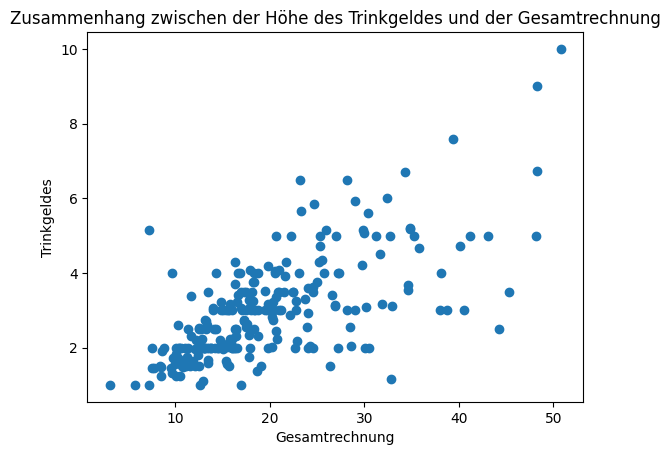

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Gesamtrechnung')
plt.ylabel('Trinkgeldes')
plt.title('Zusammenhang zwischen der Höhe des Trinkgeldes und der Gesamtrechnung')
plt.show()

#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

In [30]:
mean_tip_by_gender = df.groupby('sex')['tip'].mean()
print(mean_tip_by_gender)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (sodass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

#### b) (1%) Laden Sie Ihre veränderte csv-Datei mithilfe von Pandas in einen Dataframe.

#### c) (4%) Untersuchen Sie die Spalte `Sex`. Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

#### d) (8%) Bearbeiten Sie den Datensatz mithilfe von Pandas, sodass in der Spalte `Sex` nur eine binäre und konsistente Unterscheidung von männlich (m) und weiblich (f) zu finden ist. 

#### e) (8%) Bereinigen Sie die Spalte `Name`. Entfernen Sie Anreden wie *Mr., Mrs., Master*,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

---

## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den bereinigten Titanic-Datensatz als Pandas DataFrame (https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv)

#### 2. Beziehen Sie sich für die Beantwortung der folgenden Fragen auf von Ihnen erstellte Diagramme. Nutzen Sie Seaborn zum Plotten und beachten Sie die Guidelines aus der Vorlesung. 

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere? Nutzen Sie auch statistische Kennzahlen zur Beschreibung der Verteilung.

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter?

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

#### e. (10%) Wie hoch ist der durchschnittliche Ticketpreis (`fare`) für jede Klasse? 

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?